In [3]:
pip install smt

  Obtaining dependency information for smt from https://files.pythonhosted.org/packages/1f/b7/5b118d3f4f2afa8382c2c7cdfa9ba90d3371a730109005b2ee2da7270cbf/smt-2.9.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/62/27/585859e72e117fe861c2079bcba35591a84f801e21bc1ab85bce6ce60305/scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pyDOE3 from https://files.pythonhosted.org/packages/4e/c4/adf186c5d61793230e50027feb70b187dd82352112cec48a9d9ff0daedb1/pydoe3-1.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for jenn from https://files.pythonhosted.org/packages/1e/cd/8d705a417b2dd5bb7383abeef7cb5d2522805d70c804a7ba784be5a5bb91/jenn-1.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpointer>=2.4 from https://files.pythonhosted.org/packages/71/92/5e77f98553e9e75130c78900d000368476aed74276eb8ae8796f65f00918/jsonpointer-3.0.0-py

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.2596483
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 5
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


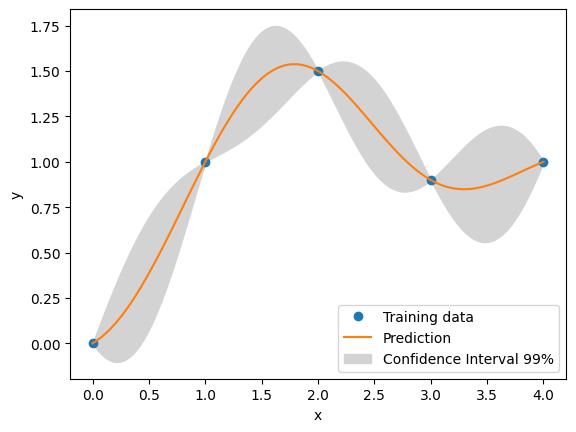

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from smt.surrogate_models import KRG

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = KRG(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)
# derivative according to the first variable
_dydx = sm.predict_derivatives(xt, 0)
_, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import dblquad
from smt.sampling_methods import Random
def f(x,y):
    return np.exp(-x**2-y**2)
def obj(x,y,l):
    return dblquad(f,[0,4],[]0,3],)
xlimits = np.array([[0.0, 4.0], [0.0, 3.0]])
sampling = Random(xlimits=xlimits, random_state=12)
length = Random([0,3])
num = 50
x = sampling(num)
print(x)


[[1.00329783 2.84025883]
 [0.75728154 0.53787423]
 [1.39955696 0.69162374]
 [2.68178297 0.34523815]
 [3.58523749 2.57439147]
 [0.01130813 1.62439849]
 [0.4274051  0.77386488]
 [1.66758416 1.36084837]
 [1.87258636 2.7825501 ]
 [1.03508436 0.56367063]
 [2.6820419  2.83985611]
 [3.6912435  2.64075   ]
 [0.25742278 2.81008837]
 [2.59696148 2.61466754]
 [1.63239387 0.6581698 ]
 [3.17188031 1.98490341]
 [3.11536037 0.60403409]
 [0.53740695 2.29087527]
 [0.08091489 2.83680204]
 [0.54035145 1.80033086]
 [1.67602819 0.97168516]
 [0.68098509 2.3411484 ]
 [3.65809835 2.18661415]
 [2.40113915 2.13436161]
 [2.14435443 1.67479603]
 [3.62433548 0.84792123]
 [0.88885559 2.84090461]
 [3.77246671 1.42799138]
 [3.203112   2.22974993]
 [3.79706448 0.24510987]
 [3.59262879 1.50037154]
 [1.79585353 2.06028034]
 [2.46590729 1.30960897]
 [1.16442859 2.75599178]
 [3.27524223 0.30739074]
 [1.61789135 2.29020649]
 [3.51623739 2.88668829]
 [0.96288356 2.67521055]
 [2.77948225 0.20460955]
 [0.84251537 0.56607596]


: 

In [ ]:
from typing import Tuple, Union, List, Type
from copy import deepcopy
import pandas as pd
import numpy as np
from numpy import number
from scipy.stats.qmc import LatinHypercube as lhs
from scipy.stats.qmc import scale

class CallableClass:
  def __call__(self, *args, **kwargs):
    pass
 
class ConstraintCalculator:
 #"""
 #A class that calculates the constraint violation of an optimization
 #problem that is passed in.
 #>>> myCalc = ConstraintCalculator(optprob)
 #>>> myCalc = ConstraintCalculator(optprob, individual=True) # Return the
 #overall constraint violation as well as each individual constraint
 #violation.
 #>>> viol = myCalc(data) # Here data is all points to calculate constraint
 #violation of. We will only calculate the constraint violations of responses.
 #"""
  def __init__(
    self, problem: dict, individual: bool = False, method: str = "euclid"
  ) -> None:
 #"""Initialize the object.
 #>>> myCalc = ConstraintCalculator(optprob)
 #>>> myCalc = ConstraintCalculator(optprob, individual=True) # Return
    if not isinstance(problem, dict):
       raise TypeError(
    "ConstraintCalculator: opt_prob must be a "
     f"dictionary! Received a {type(problem).__name__} instead."
    )
  # Save optimization problem dictionary
    self._problem = problem
  # Create shift and scale object
    self._shift_scale = ShiftAndScale(problem)
   # Save constraint names
    self._constraint_names = problem["constraints"]
 # Save bounds in easy dataframe assembly format
    bounds = [[
      problem["responses"][constraint]["bounds"][0]
      for constraint in self._constraint_names
      ],[
      problem["responses"][constraint]["bounds"][1]
      for constraint in self._constraint_names
      ],
    ]
 # Shift and scale bounds
    rescaled_bounds = self._shift_scale.design_to_optimizer_space(
      pd.DataFrame(data=bounds, columns=self._constraint_names),
      self._constraint_names,
    )
 # Save bounds
    self._lower_bounds = {
      constraint: rescaled_bounds.loc[0, constraint]
      for constraint in self._constraint_names
    }
    self._upper_bounds = {
      constraint: rescaled_bounds.loc[1, constraint]
      for constraint in self._constraint_names
    }
 # Set whether or not each individual constraint violation is returned
    self._individual = individual
 # Set which method to use
    valid_methods = {
      "euclid", # Euclidean/L2 norm
      "manhat", # Manhattan/taxicab/L1 norm
      "max", # Maximium norm
      "avg", # Average violation
      "median", # Median violation
      "prod", # Product of violations
    }
 # Check that method is valid
    if method.lower() not in valid_methods:
      raise ValueError(
        f"ConstraintCalculator: {method} is not a valid "
        f'method! Must be one of: {", ".join(valid_methods)}'
      )
    self._method = method
def __call__(
  self, data: pd.DataFrame
) -> Union[pd.Series, Tuple[pd.Series, pd.DataFrame]]:
  """Calculate the constraint violation of the given points in rescaled coord
  Parameters
  ----------
  data : pd.DataFrame
  All data points to calculate the constraint violation of.
  Returns
  -------
  pd.Series or (pd.Series, pd.DataFrame)
  Constraint violation of each point. If `individual` was specified in
  the constructor then the constraint violation of each variable for
  all points is also returned.
  """
  # Create series to save violation of each point
  total_violation = pd.Series(index=data.index, dtype=np.float64)
  # Set violation of all points containing NaN values to NaN
  valid_vals = ~data.loc[:, self._constraint_names].isna().any(axis=1)
  total_violation.loc[~valid_vals] = np.nan
  # Shift and scale data
  rescaled_data = self._shift_scale.design_to_optimizer_space(
    data, self._constraint_names
  )
 # Calculate individual constraint violation
  violation = np.maximum(
    0,
    np.maximum(
      self._lower_bounds - rescaled_data, rescaled_data - self._upper_bou
    ),
  )

 # Calculate total violation for each point
  total_violation.loc[valid_vals] = self._compute_violation(violation[valid_v
  # Return results
  if self._individual:
    return (total_violation, violation)
  return total_violation
def _compute_violation(self, violations: pd.DataFrame) -> pd.Series:
 """Compute the total constraint violation using the desired method.
 Parameters
 ----------
 violations : pd.DataFrame
 Individual constraint violations.
 Returns
 -------
 pd.Series
 Constraint violation for each site.
 Raises
Exploring the design space using Latin Hypercube
experimental designs
We now have all the needed classes and methods to explore the feasible space of the
examples we provided. To simplify this we wrote some more helper routines.
The first method takes a problem and the number of sites to use in an experiment, and
creates a set of sites using the SciPy Latin Hypercube Sampling method. This method needs
the number of variables to generate an unscaled set of points, and then uses the bounds
defined for each variable to scale the problem such that it can be used. It then creates and
returns a DataFrame of the sites in the design space.
 ------
 NotImplementedError
 Method has not been implemented.
 """
 # Euclidean distance
  if self._method == "euclid":
    ret = ((violations**2).sum(axis=1)) ** 0.5
 # Manhattan/taxicab distance
  elif self._method == "manhat":
    ret = violations.sum(axis=1)
 # Maximum norm
  elif self._method == "max":
    ret = violations.max(axis=1)
 # Average violation
  elif self._method == "avg":
    ret = violations.mean(axis=1)
 # Median violation
  elif self._method == "median":
    ret = violations.median(axis=1)
 # Product of violations
  elif self._method == "prod":
    ret = violations.prod(axis=1)
  else:
    raise NotImplementedError(
    f"ConstraintCalculator: {self._method} " "has not been implemented 
    )
  return ret


def simple_experiment(problem: dict, n_samples: int) -> pd.DataFrame:
  variables = list(problem["variables"].keys())
  nind = len(variables)
  # Get all the bounds for the variables
  bounds = np.array([problem["variables"][var]["bounds"] for var in variables])
  # Generate the experiment 
  lhs_instance = lhs(
  nind,
  scramble=True,
  strength=1,
  optimization=None,
  seed=1232,
  )
 # Get the experiment
  normalized_array = lhs_instance.random(n_samples)
 # Scale using the bounds
  exp_array = scale(normalized_array, bounds[:, 0], bounds[:, 1])
 # Create the DataFrame
  exp_df = pd.DataFrame(data=exp_array, columns=variables)
  return(exp_df)

def testing(local_eval: CallableClass, num_sites: int) -> pd.DataFrame:
  eps = 1.e-6
  local_problem = local_eval.problem()
  exp_data = simple_experiment(local_problem, num_sites)
  local_eval(exp_data)
  my_constraint_calculator = ConstraintCalculator(local_problem)
  exp_data['__conviol__'] = my_constraint_calculator(exp_data)
  exp_data['__State__'] = pd.cut(exp_data['__conviol__'], [-np.inf, eps, 100*eps, feasible_sites = (exp_data['__State__'] == 'Feasible').sum()
  percentage = feasible_sites/num_sites * 100
  print(f"Test evaluator {local_eval.name} with {len(local_problem['variables'])}
  return (exp_data)
